# Elección de modelo ML

## Dependencia de la cantidad de data

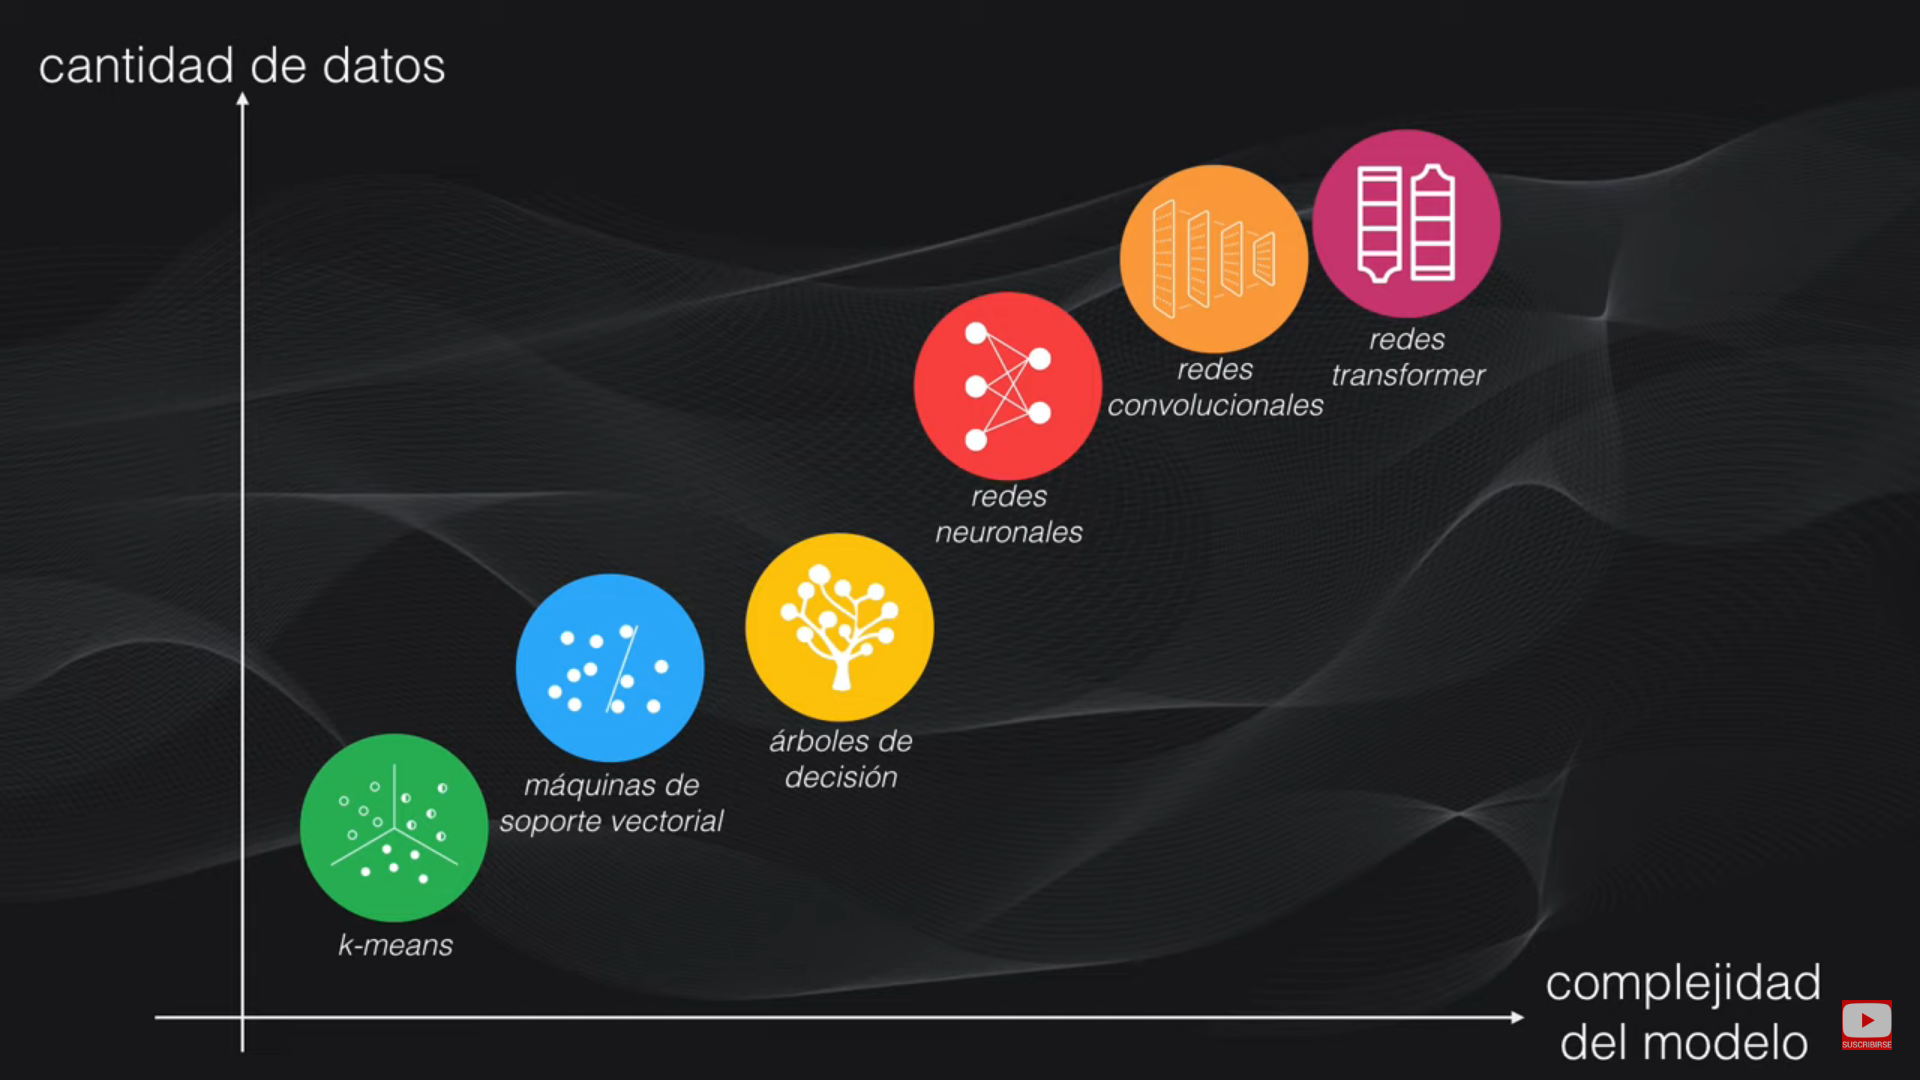

# Modelo de calculo de radiación

## Modelo Bristow-Campbell

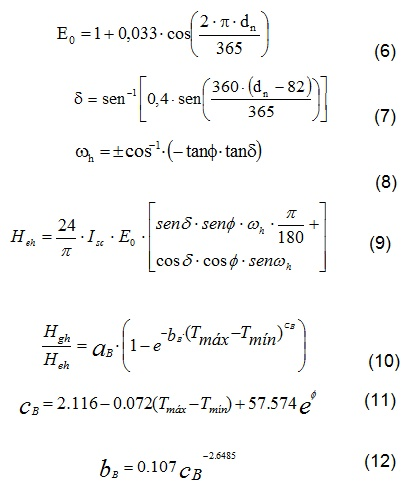

d_n: Día Juliano

pi : 3.14159265

\Delta : declinación solar

\Phi : latitud

\Theta_h : angulo horario

E_0 : 

I_sc : constante solar

H_eh : radiación solar incidente extraterrestre en un plano horizontal

c_B : 

T_min : temperatura mínima

T_max: temperatura máxima

b_B : 

a_B : 

H_gh : radiación solar global en un plano horizontal

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
path='D:/Anaconda/WeatherData/Data/'
df1 = pd.read_csv(path + 'UNI_EMDI-LabSolar_fd07122022.txt', sep="\t")
df1.head()

C:\Users\PABLO\AppData\Local\Temp\ipykernel_5476\2870946907.py:2: DtypeWarning: Columns (2,3,4,5,6,7,9,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(path + 'UNI_EMDI-LabSolar_fd07122022.txt', sep="\t")


,Unnamed: 0,Unnamed: 1,Temp,Hi,Low,Out,Dew,Wind,Wind.1,Wind.2,...,In,In .1,In .2,In .3,In Air,Unnamed: 33,Wind.4,Wind.5,ISS,Arc.
0,Date,Time,Out,Temp,Temp,Hum,Pt.,Speed,Dir,Run,...,Hum,Dew,Heat,EMC,Density,ET,Samp,Tx,Recept,Int.
1,13/10/19,11:00,18.3,18.4,18.3,78,14.4,1.3,WNW,0.80,...,50,13.6,24.7,9.22,1.1716,0.004,234,1,100.0,10
2,13/10/19,11:10,18.1,18.3,18.1,79,14.4,1.8,WNW,1.07,...,50,13.6,24.7,9.22,1.1717,0.000,235,1,100.0,10
3,13/10/19,11:20,18.2,18.2,18.1,79,14.5,1.3,WNW,0.80,...,50,13.6,24.7,9.22,1.1714,0.000,234,1,100.0,10
4,13/10/19,11:30,18.2,18.3,18.2,79,14.5,1.3,WNW,0.80,...,50,13.7,24.8,9.22,1.1712,0.000,234,1,100.0,10


In [38]:
df1.dtypes

Unnamed: 0     object
Unnamed: 1     object
Temp           object
Hi             object
Low            object
Out            object
Dew            object
Wind           object
Wind.1         object
Wind.2         object
Hi.1           object
Hi.2           object
Wind.3         object
Heat           object
THW            object
THSW           object
Unnamed: 16    object
Unnamed: 17    object
Rain           object
Solar          object
Solar.1        object
Hi Solar       object
UV             object
UV .1          object
Hi             object
Heat.1         object
Cool           object
In             object
In             object
In .1          object
In .2          object
In .3          object
In Air         object
Unnamed: 33    object
Wind.4         object
Wind.5         object
ISS            object
Arc.           object
dtype: object

In [39]:
df1.iloc[:, [0,1,2,19]]

,Unnamed: 0,Unnamed: 1,Temp,Solar
0,Date,Time,Out,Rad.
1,13/10/19,11:00,18.3,112
2,13/10/19,11:10,18.1,93
3,13/10/19,11:20,18.2,95
4,13/10/19,11:30,18.2,108
...,...,...,...,...
165488,07/12/22,20:10,18.9,0
165489,07/12/22,20:20,18.9,0
165490,07/12/22,20:30,18.8,0
165491,07/12/22,20:40,18.8,0


In [40]:
path='D:/Anaconda/WeatherData/Data/'
horizontal_stack.to_csv(path + 'SelecData.txt', index=False) # Crea archivo con la data seccionada
df2 = pd.read_csv(path + 'SelecData.txt', header=None, names=['Date', 'Time', 'Temp_out', 'Solar_Rad']) # Agrega encabezado
df2.head()

C:\Users\PABLO\AppData\Local\Temp\ipykernel_5476\3907702207.py:3: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(path + 'SelecData.txt', header=None, names=['Date', 'Time', 'Temp_out', 'Solar_Rad']) # Agrega encabezado


,Date,Time,Temp_out,Solar_Rad
0,Unnamed: 0,Unnamed: 1,Temp,Solar
1,Date,Time,Out,Rad.
2,13/10/19,11:00,18.3,112
3,13/10/19,11:10,18.1,93
4,13/10/19,11:20,18.2,95


In [41]:
path='D:/Anaconda/WeatherData/Data/'
df2.drop([0,1],axis=0).to_csv(path + 'SelecData.txt',index=False)
pd.read_csv(path + 'SelecData.txt')

C:\Users\PABLO\AppData\Local\Temp\ipykernel_5476\687912825.py:3: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv(path + 'SelecData.txt')


,Date,Time,Temp_out,Solar_Rad
0,13/10/19,11:00,18.3,112
1,13/10/19,11:10,18.1,93
2,13/10/19,11:20,18.2,95
3,13/10/19,11:30,18.2,108
4,13/10/19,11:40,18.1,136
...,...,...,...,...
165487,07/12/22,20:10,18.9,0
165488,07/12/22,20:20,18.9,0
165489,07/12/22,20:30,18.8,0
165490,07/12/22,20:40,18.8,0


Se ha separado las columnas. Falta ver los huecos de manera temporal.